In [332]:
import pickle
import numpy as np

In [333]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [334]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [335]:
type(test_data)

list

In [336]:
type(train_data)

list

In [337]:
len(train_data)

10000

In [338]:
len(test_data)

1000

In [339]:
train_data[0] # train data sentences followed with a questin and an answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [340]:
# story
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [341]:
# question
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [342]:
# answer
train_data[0][2]

'no'

In [343]:
# create a vocabulary
all_data = test_data + train_data

In [344]:
len(all_data)

11000

In [345]:
set(train_data[0][0]) # turn list into a set

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

## Setting up Vocabulary of all words

In [346]:
vocab = set()

for story, question, answer in all_data:
    # unite all sets into one set (it organize values and remove repeated ones)
    # https://www.programiz.com/python-programming/methods/set/union
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [347]:
vocab.add('no')

In [348]:
vocab.add('yes')

In [349]:
# set of all the possible vocab words
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [350]:
vocab_len = len(vocab) + 1 # (+ 1 is the placeholder that we will use later on, by deffect is 0)

In [351]:
vocab_len

38

In [352]:
# LONGEST STORY
# the all stories length
all_story_lens = [len(data[0]) for data in all_data]

In [353]:
max_story_len = max(all_story_lens) # get the max length

In [354]:
max_story_len

156

In [355]:
# LONGEST QUESTION
# get max question length too
all_question_lens = [len(data[1]) for data in all_data]
max_question_len = max(all_question_lens)

In [356]:
max_question_len

6

## Vectorizing the Data

In [357]:
# part 2: Vectorizing stories
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [358]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [359]:
tokenizer.word_index

{'left': 1,
 'there': 2,
 'yes': 3,
 'went': 4,
 'dropped': 5,
 'the': 6,
 'john': 7,
 'football': 8,
 'down': 9,
 'in': 10,
 'milk': 11,
 'is': 12,
 'journeyed': 13,
 'hallway': 14,
 'kitchen': 15,
 'got': 16,
 'garden': 17,
 'picked': 18,
 'bathroom': 19,
 'back': 20,
 'discarded': 21,
 'sandra': 22,
 'no': 23,
 'bedroom': 24,
 'travelled': 25,
 'moved': 26,
 '.': 27,
 'put': 28,
 'apple': 29,
 'up': 30,
 'daniel': 31,
 'took': 32,
 'to': 33,
 'grabbed': 34,
 '?': 35,
 'office': 36,
 'mary': 37}

In [360]:
# tokenization for stories, questions and answers
train_story_text = []
train_question_text = []
train_answers = []

In [361]:
# separate each of them
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
#     train_answers.append(answer)

In [362]:
# turning each text's word into its matching word sequence (check tokenizer.word_index)
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [363]:
len(train_story_seq)

10000

In [364]:
len(train_story_text)

10000

In [365]:
train_story_seq # story vector

[[37, 26, 33, 6, 19, 27, 22, 13, 33, 6, 24, 27],
 [37,
  26,
  33,
  6,
  19,
  27,
  22,
  13,
  33,
  6,
  24,
  27,
  37,
  4,
  20,
  33,
  6,
  24,
  27,
  31,
  4,
  20,
  33,
  6,
  14,
  27],
 [37,
  26,
  33,
  6,
  19,
  27,
  22,
  13,
  33,
  6,
  24,
  27,
  37,
  4,
  20,
  33,
  6,
  24,
  27,
  31,
  4,
  20,
  33,
  6,
  14,
  27,
  22,
  4,
  33,
  6,
  15,
  27,
  31,
  4,
  20,
  33,
  6,
  19,
  27],
 [37,
  26,
  33,
  6,
  19,
  27,
  22,
  13,
  33,
  6,
  24,
  27,
  37,
  4,
  20,
  33,
  6,
  24,
  27,
  31,
  4,
  20,
  33,
  6,
  14,
  27,
  22,
  4,
  33,
  6,
  15,
  27,
  31,
  4,
  20,
  33,
  6,
  19,
  27,
  31,
  18,
  30,
  6,
  8,
  2,
  27,
  31,
  4,
  33,
  6,
  24,
  27],
 [37,
  26,
  33,
  6,
  19,
  27,
  22,
  13,
  33,
  6,
  24,
  27,
  37,
  4,
  20,
  33,
  6,
  24,
  27,
  31,
  4,
  20,
  33,
  6,
  14,
  27,
  22,
  4,
  33,
  6,
  15,
  27,
  31,
  4,
  20,
  33,
  6,
  19,
  27,
  31,
  18,
  30,
  6,
  8,
  2,
  27,
  31,
  4,
  3

In [366]:
# create method to vectorize stories, questions and answers (same steps as before)
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    
    # STORIES = X
    X = []
    # QUESTIONS Xq
    Xq = []
    # Y CORRECT ANSWER (yes/no)
    Y = []
    
    for story, query, answer in data:
        
        # for each story
        # [23, 14, ...]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [367]:
# now we have our data formatted (Vectorized) and we can use it to create our models
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [368]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [369]:
inputs_test

array([[ 0,  0,  0, ...,  6, 24, 27],
       [ 0,  0,  0, ...,  6, 17, 27],
       [ 0,  0,  0, ...,  6, 17, 27],
       ...,
       [ 0,  0,  0, ...,  6, 29, 27],
       [ 0,  0,  0, ...,  6, 17, 27],
       [ 0,  0,  0, ..., 29,  2, 27]], dtype=int32)

In [370]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [371]:
tokenizer.word_index['yes'] # position of the answer yes

3

In [372]:
tokenizer.word_index['no'] # position of the answer no

23

In [373]:
sum(answers_test) # here you can see the two previous indexes

array([  0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [374]:
sum(answers_test)[7]

0.0

In [375]:
sum(answers_test)[13]

0.0

In [376]:
# part 3: Build the Neural Network
    # Input Encoder M
    # Input Encoder C
    # Question Encoder
# Complete the Network

In [377]:
 from keras.models import Sequential,Model

In [378]:
from keras.layers.embeddings import Embedding

In [379]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [380]:
# PLACEHOLDERS shape=(max_story_len, batch_size): They will receive input later based on stories and questinos
# We will pass this to our encoders
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [381]:
# Create input encoders
# 1. Define vocabulary size (voca_len)
vocab_size = len(vocab) + 1

In [382]:
# INPUT ENCODER M: Get embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
# when bigger is the value, longer is the training
input_encoder_m.add(Dropout(0.5)) # 50% of the neurons will be turned off, that helps with over feeding

# OUTPUT
# (samples, story_maxlen, embedding_dim)

In [383]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.5))

# OUTPUT
# (samples, story_maxlen, max_question_len)

In [384]:
# QUESTION ENCODER
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# OUTPUT
# (samples, query_maxlen, embedding_dim)

In [385]:
#  ENCODED <--- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [386]:
# Use a dot product to compute the match between the first input vector sequence and the query

In [387]:
# dot product computed match for the first input vector sequence and the query
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [388]:
# add this match matrix with the second input vector sequence
response = add([match, input_encoded_c])
response = Permute((2,1))(response) # to have an output of examples by querie max len, by story max len

In [389]:
# concatenate match matrix with the question vector sequence (Concatenate response with question)
answer = concatenate([response, question_encoded])

In [390]:
answer # The None is the batch_size that we did not define yet

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_4')>

In [391]:
# BUILD OUR MODEL: Reduce our answer with our current Neural Network

In [392]:
answer = LSTM(32)(answer)

In [393]:
answer = Dropout(0.5)(answer)
# this outputs something in the form of samples by the vocab size 
# we should only see a marking for YES or NO, everything else is just a bunch of 0.
# Just as we did when we vectorized the answers
answer = Dense(vocab_size)(answer) # (samples, vocab_size) # YES/NO 0000

In [394]:
# output the probability distribution over the vocabulary
# turn YES and NO into 0 and 1
answer = Activation('softmax')(answer)

In [395]:
# build the final model: Passing the PLACEHOLDERS
model = Model([input_sequence, question], answer)

In [396]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [397]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_12 (Sequential)      (None, None, 64)     2432        input_9[0][0]                    
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 6, 64)        2432        input_10[0][0]                   
____________________________________________________________________________________________

In [398]:
# Part 4: Fit/Train the network (the model)

In [399]:
history = model.fit(
    [inputs_train, queries_train],
    answers_train,
    batch_size=32, # smaller batch sizes with longer trained epochs slightly get better results
    epochs=10, validation_data=([inputs_test, queries_test], answers_test))


Epoch 1/10
313/313 [==============================] - 6s 11ms/step - loss: 1.2522 - accuracy: 0.4931 - val_loss: 0.6967 - val_accuracy: 0.4970
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.7033 - accuracy: 0.5139 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6984 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 4/10
313/313 [==============================] - 2s 8ms/step - loss: 0.6956 - accuracy: 0.5062 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 5/10
313/313 [==============================] - 2s 8ms/step - loss: 0.6935 - accuracy: 0.5120 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6948 - accuracy: 0.4978 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - accuracy: 0.4941 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch

In [400]:
# Plotting out our training history

In [401]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


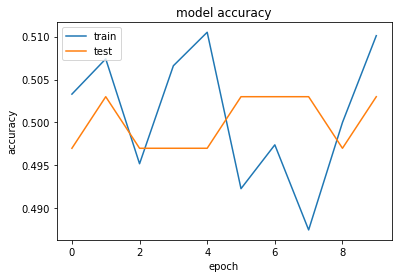

In [402]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [403]:
# save this model
# model.save('mybrandnewmodel.h5')

In [404]:
# load model
model.load_weights('chatbot_10.h5')

In [405]:
pred_results = model.predict(([inputs_test, queries_test]))

In [406]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [407]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [408]:
test_data[0][2]

'no'

In [409]:
pred_results.shape # ([stories, questions, answer], vocab_words+1)

(1000, 38)

In [410]:
pred_results[0] # probability of every single vocab word

array([1.8557961e-10, 1.8946521e-10, 1.9676516e-10, 1.8488079e-10,
       2.0658567e-10, 1.9894299e-10, 8.6911863e-01, 1.8763040e-10,
       1.9098180e-10, 1.7939436e-10, 2.0138369e-10, 1.8711434e-10,
       2.0953733e-10, 1.8792050e-10, 1.5203180e-10, 1.9112099e-10,
       1.8068864e-10, 2.1458739e-10, 1.8102912e-10, 1.3088132e-01,
       1.8120599e-10, 1.9697131e-10, 1.8972340e-10, 1.8157757e-10,
       1.7141945e-10, 2.0551745e-10, 2.0436354e-10, 1.7677557e-10,
       1.6754341e-10, 1.7336964e-10, 1.9137744e-10, 1.9344913e-10,
       1.7140997e-10, 1.8196311e-10, 1.6388217e-10, 2.0498503e-10,
       1.9393458e-10, 1.6234590e-10], dtype=float32)

In [411]:
# get the max probability
val_max = np.argmax(pred_results[0])

In [412]:
# tokenizer.word_index
# np.argmax(pred_results[0])

In [413]:
# take the word from our vocabulary
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [414]:
k # this should be 'no', there is a mistake somewhere...

'the'

In [415]:
pred_results[0][val_max] 

0.86911863

## Test our model

In [416]:
# This is our the vocabulary that our model knows, we can only use these words to ask questions to the model.
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [458]:
# Creating stories
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [459]:
my_story.split()

['John',
 'left',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'football',
 'in',
 'garden',
 '.']

In [460]:
my_question = "Is the football in the garden ?"

In [461]:
my_question.split()

['Is', 'football', 'in', 'garden', '?']

In [462]:
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [463]:
mydata

[(['John',
   'left',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'football',
   'in',
   'garden',
   '.'],
  ['Is', 'football', 'in', 'garden', '?'],
  'yes')]

In [464]:
# vectorize data
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [465]:
# my_story
# my_ques
# my_ans

In [466]:
# predict data with the model
pred_results = model.predict(([my_story, my_ques]))

In [467]:
# get the max value of the predicted results
val_max = np.argmax(pred_results[0])

In [468]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [469]:
k # this should be yes, there is a mistake somewhere...

'the'

In [470]:
pred_results[0][val_max]

0.9947726